In [223]:
import pywt
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import  os
from scipy.io import loadmat
import scipy.io as sio
import time

In [224]:
    data_path = r'data\12k Drive End Bearing Fault Data'##原始数据地址
    save_path=r'nonoise_data'

In [225]:
    file_1=os.listdir(data_path)
    for k in file_1:
        d_path=os.path.join(data_path, k)
        filenames = os.listdir(d_path)
        for i in filenames:
            data = loadmat(os.path.join(d_path, i))
            names_number = re.findall(r"\d+", i)
            if int(names_number[0]) < 100:
                names_number = '0' + str(names_number[0])
            else:
                names_number = str(names_number[0])
                # 原始数据
            org_DE = data['X' + names_number + '_DE_time']
            org_FE = data['X' + names_number + '_FE_time']
            #org_BA = data['X' + names_number + '_BA_time']
                #nonoise_DE=org_DE
               # nonoise_FE=org_FE
            sio.savemat( os.path.join(save_path,k, i),
                        {'X' + names_number + '_DE_time': org_DE, 'X' + names_number + '_FE_time': org_FE,'X' + names_number + '_BA_time': org_BA})

                
                

In [226]:
data1=loadmat(os.path.join(d_path, '130.mat'))
print(type(data1))
print(data1)
org_DE = data1['X' + '130' + '_DE_time']
print(type(org_DE))

<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:59:43 2000', '__version__': '1.0', '__globals__': [], 'X130_DE_time': array([[ 0.00852784],
       [ 0.4235496 ],
       [ 0.01299481],
       ...,
       [ 0.17583603],
       [ 0.1100498 ],
       [-0.10274022]]), 'X130_FE_time': array([[-0.40700545],
       [ 0.26277636],
       [ 0.49514545],
       ...,
       [ 0.05958182],
       [-0.05074727],
       [ 0.02732545]]), 'X130_BA_time': array([[-4.02373887e-05],
       [ 6.93290208e-02],
       [ 3.06608902e-02],
       ...,
       [ 1.18297923e-01],
       [ 5.66542433e-02],
       [-1.05019585e-02]]), 'X130RPM': array([[1796]], dtype=uint16)}
<class 'numpy.ndarray'>


In [201]:
    or_data=org_DE
    index = []
    data = []
    
    
    for i in range(len(or_data) - 1):
        X = float(i)
        Y = float(or_data[i])
        index.append(X)
        data.append(Y)

    #Create wavelet object and define parameters
    w = pywt.Wavelet('db8')  # 选用Daubechies8小波
    maxlev = (len(data), w.dec_len)#Compute the maximum useful level of decomposition
    print("maximum level is " + str(maxlev))
    threshold = 0.04  # Threshold for filtering

    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'db8', level=16)  # 将信号进行小波分解

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))  # 将噪声滤波

    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构

    mintime = 0
    maxtime = mintime + len(data) + 1
    


maximum level is (121990, 16)


D:\anoconda\envs\pytorch\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


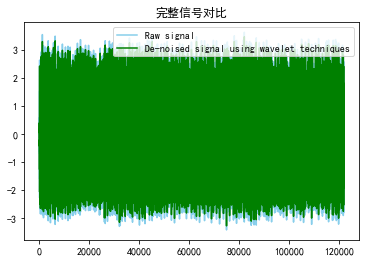

In [216]:
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.plot(index[mintime:maxtime], data[mintime:maxtime],color='skyblue', label='Raw signal')
    plt.plot(index[mintime:maxtime], datarec[mintime:maxtime - 1],color='green', label='De-noised signal using wavelet techniques')
    plt.title('完整信号对比')
    plt.legend(loc=1) # 显示图例
    plt.show()


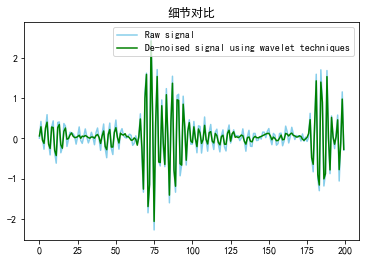

In [217]:
    plt.plot(index[mintime:200], data[mintime:200],color='skyblue', label='Raw signal')
    plt.plot(index[mintime:200], datarec[mintime:200],color='green', label='De-noised signal using wavelet techniques')
    plt.title('细节对比')
    plt.legend(loc=1) # 显示图例
    plt.show()

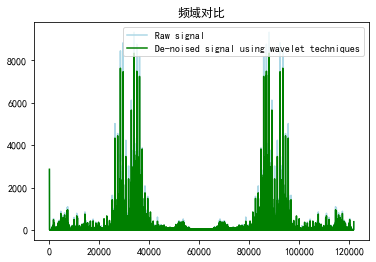

In [222]:
    fft1 = np.fft.fft(data)
    fft2 = np.fft.fft(datarec)
    plt.plot(abs(fft1),color='lightblue', label='Raw signal')
    plt.plot(abs(fft2),color='green', label='De-noised signal using wavelet techniques')
    plt.title('频域对比')
    plt.legend(loc=1) # 显示图例
    plt.show()

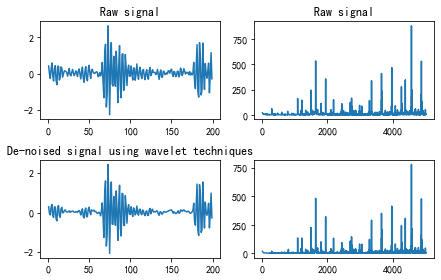

In [205]:
    plt.figure()
    plt.subplot(2, 2, 1)
    
    #plt.plot(index[mintime:maxtime], data[mintime:maxtime])
    plt.plot(index[1:200], data[1:200])
    plt.title("Raw signal")
    
    plt.subplot(2,2,2)
    fft1 = np.fft.fft(data)
    fr = np.array(range(0, len(data))) 
    region = (int)(len(fr) / 2)
    plt.plot(fr[20:5000], abs(fft1)[20:5000])
    plt.title("Raw signal")
    
    plt.subplot(2, 2,3)
    #plt.plot(index[mintime:maxtime], datarec[mintime:maxtime - 1])
    plt.plot(index[1:200], datarec[1:200])
    plt.title("De-noised signal using wavelet techniques")
    
    plt.subplot(2,2,4)
    fft2 = np.fft.fft(datarec)
    fr2 = np.array(range(0, len(datarec))) 
    region2 = (int)(len(fr2) / 2)
    plt.plot(fr[20:5000], abs(fft2)[20:5000])
   
    plt.tight_layout()
    plt.show()

In [112]:
print(type(datarec))

<class 'numpy.ndarray'>


In [102]:
import re
import pywt
import matplotlib.pyplot as plt
import  os
from scipy.io import loadmat
import scipy.io as sio
import time

#小波变换法
def wavelet_means(or_data):
    index = []
    data = []
    for i in range(len(or_data) - 1):
        X = float(i)
        Y = float(or_data[i])
        index.append(X)
        data.append(Y)

    #Create wavelet object and define parameters
    
    w = pywt.Wavelet('db8')  # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)#Compute the maximum useful level of decomposition
    coeffs = pywt.wavedec(data, 'db8', level=maxlev)  # 将信号进行小波分解
    
    for i in range(1, len(coeffs)):#coeffs为小波分解后的列表
        tmp = coeffs[i].copy()
        Sum = 0.0
        for j in coeffs[i]:
            Sum = Sum + abs(j)
        N = len(coeffs[i])
        Sum = (1.0 / float(N)) * Sum
        sigma = (1/0.6745)*Sum
        lamda = sigma * math.sqrt(2.0 * math.log(float(N), math.e))#lamda为求出的阈值
    #print(lamda)
   
    
    #threshold = 0.15  # Threshold for filtering
    # Decompose into wavelet components, to the level selected:
    
    for i in range(1, len(coeffs)):
        #coeffs[i] = pywt.threshold(coeffs[i], lamda * abs(coeffs[i]))  # 将噪声滤波
        coeffs[i] = pywt.threshold(coeffs[i], lamda *0.5*abs(coeffs[i])) 
    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
    return datarec

def nonoise(data_path,save_path):
    file_1=os.listdir(data_path)
    for k in file_1:
        d_path=os.path.join(data_path, k)
        filenames = os.listdir(d_path)
        for i in filenames:
            data = loadmat(os.path.join(d_path ,i))
            names_number = re.findall(r"\d+", i)
            if int(names_number[0]) < 100:
                names_number = '0' + str(names_number[0])
            else:
                names_number = str(names_number[0])
                # 原始数据
            org_DE = data['X' + names_number + '_DE_time']
            org_FE = data['X' + names_number + '_FE_time']
            #org_BA = data['X' + names_number + '_BA_time']
            
            # 对数据降噪_小波变换法
            nonoise_DE = wavelet_means(org_DE)
            nonoise_FE = wavelet_means(org_FE)
            #nonoise_BA = wavelet_means(org_BA)
            # 降噪后的数据nonoise_DE、nonoise_FE、nonoise
            
            
            # 将数据存储为2维.mat数据
            sio.savemat(os.path.join(save_path,k, i),
                        {'X' + names_number + '_DE_time': nonoise_DE, 'X' + names_number + '_FE_time': nonoise_FE},
                        format='5', 
                        long_field_names=False,
                        do_compression=False,
                        oned_as='column')
            print("De-noise is done",str(os.path.join(d_path ,i)))

path1 = r'data\12k Drive End Bearing Fault Data' ##原始数据地址
path2 = r'nonoise_data'
nonoise(path1,path2)

De-noise is done data\12k Drive End Bearing Fault Data\B_default\118.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\119.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\120.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\121.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\185.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\186.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\187.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\188.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\222.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\223.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\224.mat
De-noise is done data\12k Drive End Bearing Fault Data\B_default\225.mat
De-noise is done data\12k Drive End Bearing Fault Data\IR_default\105.mat
De-noise is done data\12k Drive End Bearing Fault 

In [103]:
nomal_data = loadmat(r'nonoise_data\IR_default\107.mat')
print(nomal_data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Mar 18 13:02:21 2022', '__version__': '1.0', '__globals__': [], 'X107_DE_time': array([[-0.02500739],
       [ 0.05898602],
       [ 0.06808092],
       ...,
       [ 0.01642773],
       [-0.05832818],
       [-0.0583315 ]]), 'X107_FE_time': array([[-0.00270802],
       [-0.10430052],
       [-0.20443224],
       ...,
       [ 0.06625788],
       [ 0.05483673],
       [ 0.05483624]])}


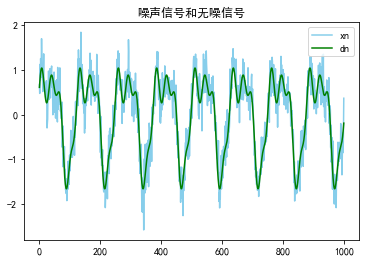

In [117]:
#模型测试
#生成带噪声的正弦信号
import random
data1=[]
index1=[]
data2=[]
for i in range(1,1000):
    data1.append(np.sin(5*i/100) + 0.5*np.cos(10*i/100)+0.3*np.sin(20*i/100))
    data2.append(np.sin(5*i/100) + 0.5*np.cos(10*i/100)+0.3*np.sin(20*i/100)+random.gauss(0,0.3))
    index1.append(i)
#x=np.linspace(1,3000,3000)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('噪声信号和无噪信号')

plt.plot(data2,color='skyblue', label='xn')
plt.plot(data1,color='green', label='dn')
plt.legend(loc=1) # 显示图例
plt.show()
data1=(np.array(data1))

In [118]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse0= rmse(data1,data2)
print(rmse0)

0.299028203882772


In [190]:
def wavelet_means(or_data):
    index = []
    data = []
    for i in range(len(or_data)-1):
        X = float(i)
        Y = float(or_data[i])
        index.append(X)
        data.append(Y)

    #Create wavelet object and define parameters
    
    w = pywt.Wavelet('db8')  # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)#Compute the maximum useful level of decomposition
    coeffs = pywt.wavedec(data, 'db8', level=maxlev)  # 将信号进行小波分解
    
    for i in range(1, len(coeffs)):#coeffs为小波分解后的列表
        tmp = coeffs[i].copy()
        Sum = 0.0
        for j in coeffs[i]:
            Sum = Sum + abs(j)
        N = len(coeffs[i])
        Sum = (1.0 / float(N)) * Sum
        sigma = (1/0.6745)*Sum
        lamda = sigma * math.sqrt(2.0 * math.log(float(N), math.e))#lamda为求出的阈值
    #print(lamda)
   
    
    #threshold = 0.15  # Threshold for filtering
    # Decompose into wavelet components, to the level selected:
    
    for i in range(1, len(coeffs)):
        #coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))  # 将噪声滤波
        coeffs[i] = pywt.threshold(coeffs[i], lamda *0.2*max(coeffs[i])) 
    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
    return datarec

Running time: 0.009262323379516602 Seconds


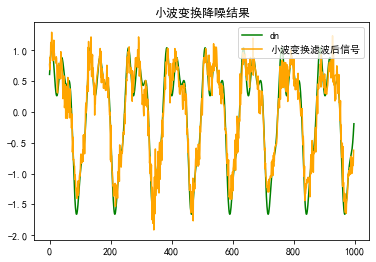

0.2382883213344884


In [192]:
import time

start=time.time()
nonoise_data= wavelet_means(data2)
end = time.time()
print('Running time: %s Seconds' % (end - start))

plt.title('小波变换降噪结果')

plt.plot(data1,color='green', label='dn')
plt.plot(nonoise_data, color='orange',label='小波变换滤波后信号')

plt.legend(loc=1) # 显示图例
plt.show()
rmse1= rmse(data1[0:998],nonoise_data)
print(rmse1)

In [121]:
rmse1= rmse(data1[0:998],nonoise_data)
print(rmse1)

0.31381191305282513
